In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

## Now divide the test data into test and validation data

In [22]:
try:
    source1 = "NEU/test"
    os.mkdir("MAIN/NEU/valid")
    dest11 = "NEU/valid"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


In [23]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\LENOVO\Desktop\Minor Project\metal-defect\images\NEU Metal Surface Defects Data\train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\LENOVO\Desktop\Minor Project\metal-defect\images\NEU Metal Surface Defects Data\valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.986 ):
            print("\nReached 98.6% accuracy so cancelling training!")
            self.model.stop_training = True

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

e:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [27]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

e:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 101s 583ms/step - accuracy: 0.2393 - loss: 1.9110 - val_accuracy: 0.7222 - val_loss: 1.1080
Epoch 2/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 67s 404ms/step - accuracy: 0.5439 - loss: 1.2366 - val_accuracy: 0.5278 - val_loss: 1.0303
Epoch 3/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 63s 379ms/step - accuracy: 0.6827 - loss: 0.8558 - val_accuracy: 0.8611 - val_loss: 0.4477
Epoch 4/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 62s 372ms/step - accuracy: 0.7597 - loss: 0.7419 - val_accuracy: 0.8889 - val_loss: 0.4192
Epoch 5/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 59s 352ms/step - accuracy: 0.8333 - loss: 0.4913 - val_accuracy: 0.9028 - val_loss: 0.2717
Epoch 6/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 61s 368ms/step - accuracy: 0.8416 - loss: 0.4821 - val_accuracy: 0.8889 - val_loss: 0.3631
Epoch 7/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 85s 511ms/step - accuracy: 0.8949 - loss: 0.3856 - val_accuracy: 0.9722 - val_loss: 0.1128
Epoch 8/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 59s 354ms/step - accuracy: 0.8779 - loss: 

<!-- we have achieved a accuracy of 90 percentage -->

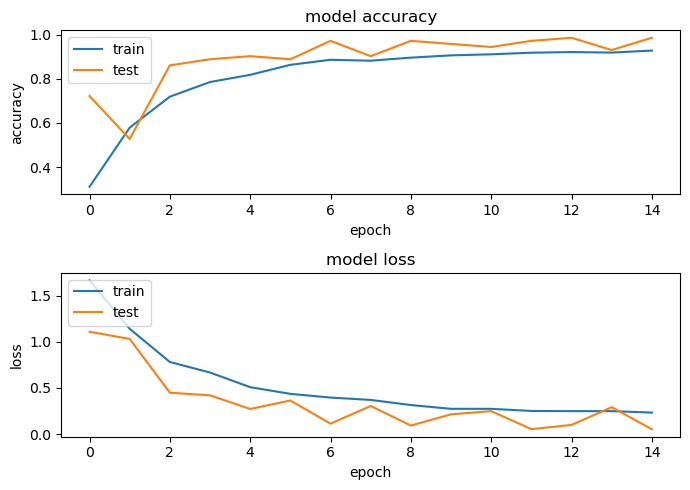

In [28]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,5))  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.tight_layout()
plt.show()


In [12]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Define your target labels (replace with your actual labels)
target_labels = ["crazing", "inclusion","patches","pitted","rolled","scratches"]

# Capture user input image (this step depends on your application)
user_input_image_path = 'PS_10.bmp'  # Replace with the actual path to the user's image

# Load and preprocess the user input image
user_input_image = img_to_array(load_img(user_input_image_path, target_size=(200, 200)))
user_input_image = user_input_image.astype('float32') / 255

# Make predictions using your pre-trained model
user_input_image = np.expand_dims(user_input_image, axis=0)  # Add batch dimension
prediction = model.predict(user_input_image)

# Get the defect type based on the prediction
defect_type = target_labels[np.argmax(prediction)]

# Display the input image and the predicted defect type to the user
print(f"Predicted defect type: {defect_type}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted defect type: pitted


In [30]:
model.save("defect_classification_model.keras")


In [1]:
from keras.models import load_model

model = load_model("defect_classification_model.keras")
